In [2]:
using LinearAlgebra
using Plots
using ForwardDiff

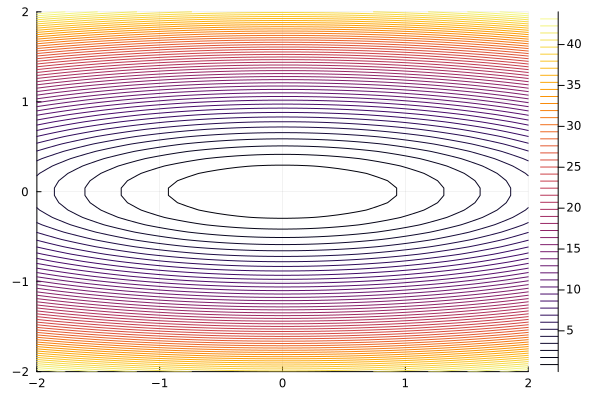

In [3]:
gr(size=(600,400))
xg = range(-2, 2, length=50)
yg = copy(xg)
f(x)= x[1]^2 + 10*x[2]^2
#surface(xg, yg, (x,y) -> f([x;y]), levels=100)
contour(xg, yg, (x,y) -> f([x;y]), levels=50)

In [4]:
function grad_conj(f, x)
    gradf(x) = ForwardDiff.gradient(f, x)
    A = ForwardDiff.hessian(f, x)
    iter = 0
    d = -gradf(x)
    while norm(gradf(x)) > 1e-4
        t =- dot(d, gradf(x)) / dot(d, A * d)
        x = x + t * d
        beta = dot(d, A * gradf(x)) / dot(d, A * d)
        d = -gradf(x) + beta * d
        iter += 1
    end
    return x, iter
end

grad_conj (generic function with 1 method)

In [5]:
function grad_conj_plot(p, f, x)
    gradf(x) = ForwardDiff.gradient(f, x)
    A = ForwardDiff.hessian(f, x)
    iter = 0
    d = -gradf(x)

    scatter!(p, [x[1]], [x[2]], c=:blue, ms=3)
    iter = 0
    while norm(gradf(x)) > 1e-4
        t =- dot(d, gradf(x)) / dot(d, A * d)
        xt = x + t * d
        plot!(p, [x[1], xt[1]], [x[2], xt[2]], c=:blue, l=:arrow)
        x=xt
        scatter!(p, [x[1]], [x[2]], c=:blue, ms=3)
        beta = dot(d, A * gradf(x)) / dot(d, A * d)
        d = -gradf(x) + beta * d
        iter += 1
    end
    return x, iter
end

grad_conj_plot (generic function with 1 method)

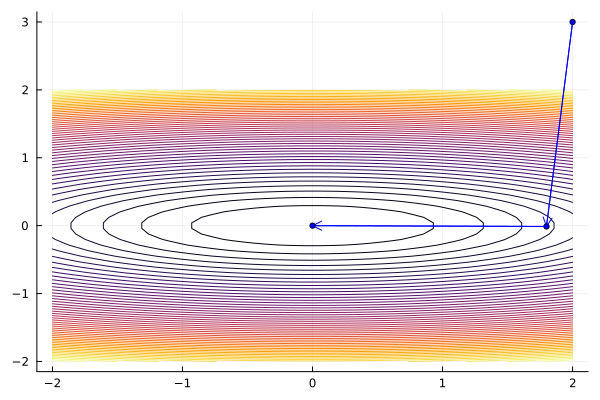

In [11]:
p = plot(leg=false)
contour!(p,xg, yg, (x,y) -> f([x;y]), levels=50)
x, iter = grad_conj_plot(p, f, [2.0; 3.0])
p